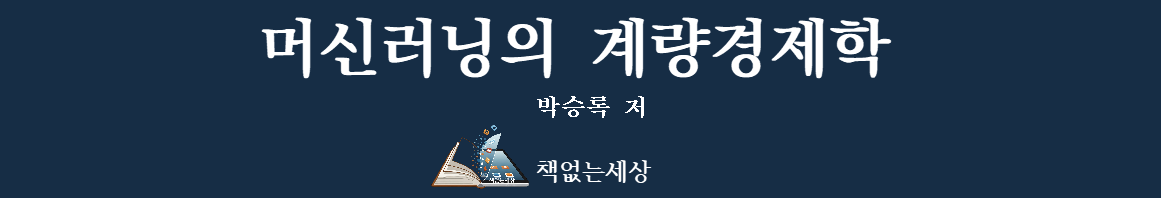

# Part 2: 파이썬 생태계 구축

# Chapter 4. 데이터세트와 변수 처리

## 1. 판다스의 데이터프레임 다루기

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:\JupyterWorkingDirectory\MyStock")
os.getcwd()

'E:\\JupyterWorkingDirectory\\MyStock'

In [2]:
exec(open('E:/JupyterWDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

C:\Users\PARKSeungRok\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
!pip install --upgrade pandas

In [5]:
import numpy as np
import pandas as pd

# 외부 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


In [9]:
# 변수의 정보(관측치수, 데이터 형태) 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# 정량적 변수(quantitative variables)의 기술 통계량 계산(discriptive statistics)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.00,51.0,64.0
bmi,1338.0,30.665471,6.098382,16.0,26.3,30.40,34.7,53.1
children,1338.0,1.094918,1.205493,0.0,0.0,1.00,2.0,5.0
charges,1338.0,13270.422422,12110.011588,1121.9,4740.3,9382.05,16639.9,63770.4


In [8]:
# 정성적 변수(qualitative variables)의 카테고리(categories)확인 1
display(data['sex'].unique()) 
display(data['smoker'].unique()) 
display(data['region'].unique())


array(['female', 'male'], dtype=object)

array(['yes', 'no'], dtype=object)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
# 정성적 변수(qualitative variables)의 카테고리(categories)확인 2
for i in data.columns.tolist(): 
        if data[i].dtype == 'O':
            display(data[i].unique().tolist())
# data의 column이름을 리스트로 해서, dtype을 확인한 후 
# object, 즉 0이면 변수명에 대해 unique한 값을 리스트로 출력

['female', 'male']

['yes', 'no']

['southwest', 'southeast', 'northwest', 'northeast']

In [10]:
# 변수명 바꾸기
df = data.copy()
newcols = {'age': '나이', 
           'sex' : '성별',
           'bmi' : '체질량지수',
           'children' : '어린이 수',
           'smoker': '흡연여부', 
           'region': '거주지역',
           'charges': '보험액'}
df.rename(columns=newcols, inplace=True)
display(df.head())

,나이,성별,체질량지수,어린이 수,흡연여부,거주지역,보험액
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


In [23]:
# 정성적 변수의 카테고리별 빈도수
display(data['sex'].value_counts())
display(data['smoker'].value_counts())
display(data['region'].value_counts())


male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
# 통계함수(Statistical functions) 사용예 1
print('sum:', data['charges'].sum())  
print('count:', data['charges'].count())  
print('max:', data['charges'].max())  
print('min:', data['charges'].min())  
print('mean:', data['charges'].mean())  
print('median:', data['charges'].median())  
print('mode:', data['charges'].mode())  
print('std:', data['charges'].std())  
print('var:', data['charges'].var())  
print('skew:', data['charges'].skew())  
print('kurt:', data['charges'].kurt()) 


sum: 17755825.2
count: 1338
max: 63770.4
min: 1121.9
mean: 13270.422421524663
median: 9382.05
mode: 0    1639.6
Name: charges, dtype: float64
std: 12110.011588010793
var: 146652380.66175568
skew: 1.5158798082930953
kurt: 1.6062991950652998


In [25]:
# 통계함수(Statistical functions) 사용예 2 
stats = ['sum', 'count', 'max', 'min', 'mean', 'median',  'mode', 'std', 'var', 'skew', 'kurt']  

for i in stats:  
    stats = getattr(data['charges'], i)()  
    print(i + ' : ', stats) 


sum :  17755825.2
count :  1338
max :  63770.4
min :  1121.9
mean :  13270.422421524663
median :  9382.05
mode :  0    1639.6
Name: charges, dtype: float64
std :  12110.011588010804
var :  146652380.66175595
skew :  1.5158798082930953
kurt :  1.6062991950652998


In [34]:
# 통계함수(Statistical functions) 사용예 2 
vars =['age', 'bmi', 'children', 'charges']
stat = ['sum', 'count', 'max', 'min', 'mean', 'median',  'mode', 'std', 'var', 'skew', 'kurt']  

for i in vars:  
    for j in stat:  
        stats = getattr(data[i], j)()  
        print(i + ' : ' + j + ' : ', stats) 


age : sum :  52459
age : count :  1338
age : max :  64
age : min :  18
age : mean :  39.20702541106129
age : median :  39.0
age : mode :  0    18
Name: age, dtype: int64
age : std :  14.049960379216172
age : var :  197.40138665754424
age : skew :  0.05567251565299186
age : kurt :  -1.2450876526418673
bmi : sum :  41030.4
bmi : count :  1338
bmi : max :  53.1
bmi : min :  16.0
bmi : mean :  30.66547085201794
bmi : median :  30.4
bmi : mode :  0    27.6
1    33.3
Name: bmi, dtype: float64
bmi : std :  6.098382190003366
bmi : var :  37.190265335350254
bmi : skew :  0.28459296016731195
bmi : kurt :  -0.05337020602503051
children : sum :  1465
children : count :  1338
children : max :  5
children : min :  0
children : mean :  1.0949177877429
children : median :  1.0
children : mode :  0    0
Name: children, dtype: int64
children : std :  1.2054927397819095
children : var :  1.4532127456668944
children : skew :  0.9383804401702414
children : kurt :  0.2024541467168901
charges : sum :  177558

In [37]:
# 0.9 분위수 계산
display(data.quantile(0.9))


age            59.00
bmi            38.63
children        3.00
charges     34831.76
Name: 0.9, dtype: float64

In [38]:
# 카테고리별 변수, 지역별 숫자변수의 평균
data.groupby('region').mean() 


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.176235,1.046296,13406.385494
northwest,39.196923,29.201846,1.147692,12417.576923
southeast,38.939560,33.359341,1.049451,14735.410989
southwest,39.455385,30.596615,1.141538,12346.936000


In [39]:
# 여러 개 카테고리별 숫자변수의 평균  
table = data.groupby(['sex', 'region']).mean().applymap('{:,.2f}'.format)  
display(table) 


age    bmi children    charges
sex    region                                     
female northeast  39.64  29.33     1.01  12,953.20
       northwest  39.59  29.28     1.12  12,479.87
       southeast  39.11  32.67     1.05  13,499.67
       southwest  39.70  30.06     1.12  11,274.41
male   northeast  38.90  29.02     1.09  13,854.01
       northwest  38.80  29.12     1.18  12,354.12
       southeast  38.78  33.99     1.05  15,879.62
       southwest  39.21  31.13     1.16  13,412.88

In [46]:
# 데이터 프레임(Data Frame)의 결합(Append and Merge)
data_1 = {'id': [1, 2, 3, 4, 5],  
          'first': ['AA', 'BB', 'CC', 'DD', 'EE'],  'last': ['FF', 'GG', 'HH', 'II', 'JJ']}  
data_2 = {'id': [3, 4, 5, 6, 7],  'Sales': [100, 200, 300, 400, 500]}  

data_1 = pd.DataFrame(data_1)  
data_2 = pd.DataFrame(data_2)  

# 겹치는 ID만 결합
inner_join = pd.merge(data_1, data_2, on = 'id')  
print(inner_join)  

# 모든 ID 결합
outer_join = pd.merge(data_1, data_2, on = 'id', how = 'outer')  
print(outer_join)  

# 왼쪽 데이터 프레임 기준
left_join = pd.merge(data_1, data_2, on = 'id', how = 'left')  
print(left_join)  

# 오른쪽 데이터 프레임 기준
right_join = pd.merge(data_1, data_2, on = 'id', how = 'right')  
print(right_join) 


   id first last  Sales
0   3    CC   HH    100
1   4    DD   II    200
2   5    EE   JJ    300
   id first last  Sales
0   1    AA   FF    NaN
1   2    BB   GG    NaN
2   3    CC   HH  100.0
3   4    DD   II  200.0
4   5    EE   JJ  300.0
5   6   NaN  NaN  400.0
6   7   NaN  NaN  500.0
   id first last  Sales
0   1    AA   FF    NaN
1   2    BB   GG    NaN
2   3    CC   HH  100.0
3   4    DD   II  200.0
4   5    EE   JJ  300.0
   id first last  Sales
0   3    CC   HH    100
1   4    DD   II    200
2   5    EE   JJ    300
3   6   NaN  NaN    400
4   7   NaN  NaN    500


In [56]:
# Wide form --> long form : pd.wide_to_long
data = pd.read_csv('Data/wideform.csv')
print(data.head())

df = pd.wide_to_long(data, ["A", "B"], i="id", j="year")
df.sort_values(by=['id', 'year'], inplace=True)
print(df)

desc1 = df.groupby(level=0, axis=0).describe()
desc2 = df.groupby(level=1, axis=0).describe()

# ID별 평균에 대한 편차
df_mean = df.groupby(level=0, axis=0).transform('mean')
df_mean.columns = ['A_mean', 'B_mean']
print(df_mean)

# 왼쪽 데이터 프레임 기준
df_join = pd.merge(df, df_mean, on = ['id', 'year'], how = 'left')  
print(df_join)  

   id  A2020  A2021  A2022  A2023  A2024  B2020  B2021  B2022  B2023  B2024
0   1     11     29     28     50     27     24     30     24     25     36
1   2     20     33     34     33     49     30     18     21     36     19
2   3     39     24     11     40     21     50     26     47     47     46
3   4     13     15     37     11     22     14     41     50     16     34
4   5     37     49     50     17     23     12     30     24     35     27
          A   B
id year        
1  2020  11  24
   2021  29  30
   2022  28  24
   2023  50  25
   2024  27  36
2  2020  20  30
   2021  33  18
   2022  34  21
   2023  33  36
   2024  49  19
3  2020  39  50
   2021  24  26
   2022  11  47
   2023  40  47
   2024  21  46
4  2020  13  14
   2021  15  41
   2022  37  50
   2023  11  16
   2024  22  34
5  2020  37  12
   2021  49  30
   2022  50  24
   2023  17  35
   2024  23  27
6  2020  34  10
   2021  12  39
   2022  26  13
   2023  47  50
   2024  27  37
7  2020  16  50
   2021  38  32


In [43]:
df = df.reset_index()
print(df.head(20))

    id  year   A   B
0    1  2020  11  24
1    1  2021  29  30
2    1  2022  28  24
3    1  2023  50  25
4    1  2024  27  36
5    2  2020  20  30
6    2  2021  33  18
7    2  2022  34  21
8    2  2023  33  36
9    2  2024  49  19
10   3  2020  39  50
11   3  2021  24  26
12   3  2022  11  47
13   3  2023  40  47
14   3  2024  21  46
15   4  2020  13  14
16   4  2021  15  41
17   4  2022  37  50
18   4  2023  11  16
19   4  2024  22  34


In [47]:
print(desc1)
print(desc2)

       A                                                    B        \
   count  mean        std   min   25%   50%   75%   max count  mean   
id                                                                    
1    5.0  29.0  13.874437  11.0  27.0  28.0  29.0  50.0   5.0  27.8   
2    5.0  33.8  10.281051  20.0  33.0  33.0  34.0  49.0   5.0  24.8   
3    5.0  27.0  12.389512  11.0  21.0  24.0  39.0  40.0   5.0  43.2   
4    5.0  19.6  10.573552  11.0  13.0  15.0  22.0  37.0   5.0  31.0   
5    5.0  35.2  14.939880  17.0  23.0  37.0  49.0  50.0   5.0  25.6   
6    5.0  29.2  12.755391  12.0  26.0  27.0  34.0  47.0   5.0  29.8   
7    5.0  32.4   9.235800  16.0  35.0  36.0  37.0  38.0   5.0  33.0   
8    5.0  25.2   8.899438  16.0  19.0  25.0  27.0  39.0   5.0  28.0   
9    5.0  30.2  12.477981  16.0  23.0  29.0  34.0  49.0   5.0  27.8   
10   5.0  29.8   6.610598  23.0  24.0  29.0  35.0  38.0   5.0  30.8   

                                             
          std   min   25%   50

In [32]:
# Long form --> Wide form : p pd.pivot_table
df_org = pd.pivot_table(df, index = ['id'], columns=['year'], values = ['A', 'B'], aggfunc='sum')
print(df_org)

        A                        B                    
year 2020 2021 2022 2023 2024 2020 2021 2022 2023 2024
id                                                    
1      11   29   28   50   27   24   30   24   25   36
2      20   33   34   33   49   30   18   21   36   19
3      39   24   11   40   21   50   26   47   47   46
4      13   15   37   11   22   14   41   50   16   34
5      37   49   50   17   23   12   30   24   35   27
6      34   12   26   47   27   10   39   13   50   37
7      16   38   36   35   37   50   32   22   24   37
8      25   19   27   16   39   11   12   27   49   41
9      16   34   49   29   23   40   14   44   12   29
10     35   23   24   38   29   29   50   26   12   37


In [33]:
df_org.columns = [''.join(map(str, col)) for col in df_org.columns.values]
df_org = df_org.reset_index()
print(df_org)


   id  A2020  A2021  A2022  A2023  A2024  B2020  B2021  B2022  B2023  B2024
0   1     11     29     28     50     27     24     30     24     25     36
1   2     20     33     34     33     49     30     18     21     36     19
2   3     39     24     11     40     21     50     26     47     47     46
3   4     13     15     37     11     22     14     41     50     16     34
4   5     37     49     50     17     23     12     30     24     35     27
5   6     34     12     26     47     27     10     39     13     50     37
6   7     16     38     36     35     37     50     32     22     24     37
7   8     25     19     27     16     39     11     12     27     49     41
8   9     16     34     49     29     23     40     14     44     12     29
9  10     35     23     24     38     29     29     50     26     12     37


In [6]:
# 행렬 y, X 만들기
import wooldridge as woo
import numpy as np
import pandas as pd
import patsy as pt

gpa1 = woo.dataWoo('gpa1')
display(gpa1)

# 샘플 사이즈와 독립변수의 수
n = len(gpa1)
k = 2

# 종속변수(y)
y = gpa1['colGPA']

# 독립변수 행렬 X에 포함될 변수와 상수항 
X = pd.DataFrame({'const': 1, 'hsGPA': gpa1['hsGPA'], 'ACT': gpa1['ACT']})
print(y, X)

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
1,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
2,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
3,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
4,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,22,0,0,0,1,0,0,1,0,3.0,...,0,1,1,1,1,0.0,0.0,1,0,0
137,21,0,0,1,0,1,0,1,0,2.3,...,0,1,1,0,0,1.0,1.0,1,0,0
138,20,0,1,0,0,0,0,1,0,2.8,...,0,1,1,1,0,0.0,0.3,1,0,0
139,20,0,1,0,0,1,1,1,0,3.4,...,1,1,1,1,1,3.0,4.0,1,0,1


0      3.0
1      3.4
2      3.0
3      3.5
4      3.6
      ... 
136    3.0
137    2.3
138    2.8
139    3.4
140    2.8
Name: colGPA, Length: 141, dtype: float64      const  hsGPA  ACT
0        1    3.0   21
1        1    3.2   24
2        1    3.6   26
3        1    3.5   27
4        1    3.9   28
..     ...    ...  ...
136      1    3.3   23
137      1    3.6   25
138      1    3.4   21
139      1    3.7   26
140      1    3.3   28

[141 rows x 3 columns]


In [7]:
# patsty 모듈을 이용한 종속변수, 독립변수 행렬 만들기(편리한 행렬만들기 방법) 
y2, X2 = pt.dmatrices('colGPA ~ hsGPA + ACT', data=gpa1, return_type='dataframe')
print(y2, X2)

     colGPA
0       3.0
1       3.4
2       3.0
3       3.5
4       3.6
..      ...
136     3.0
137     2.3
138     2.8
139     3.4
140     2.8

[141 rows x 1 columns]      Intercept  hsGPA   ACT
0          1.0    3.0  21.0
1          1.0    3.2  24.0
2          1.0    3.6  26.0
3          1.0    3.5  27.0
4          1.0    3.9  28.0
..         ...    ...   ...
136        1.0    3.3  23.0
137        1.0    3.6  25.0
138        1.0    3.4  21.0
139        1.0    3.7  26.0
140        1.0    3.3  28.0

[141 rows x 3 columns]


In [9]:
# 데이터 세트를 훈련데이터(training)와 테스트 (test)데이터 세트로 나누기(무작위 20%내외)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 시계열 자료일 때는 뒷부분의 일부가 테스트 데이터세트로 사용됨 
# test = data.loc['2020-03-31':]
# train = data.loc[:'2019-12-31']

# test = data.iloc[:-12]
# train = data.iloc[-12:]

((105, 3), (36, 3), (105,), (36,))

## 2. 변수 변환

### 가. 변수의 크기(scale) 조정 

In [32]:
# 라이브러리 sklearn 불러오기

from sklearn import preprocessing 

# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
display(data.head())

# 최대 최소값을 이용한 데이터 크기 조정
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))  

data['MM_age'] = minmax_scale.fit_transform(data[['age']])  
data['MM_bmi'] = minmax_scale.fit_transform(data[['bmi']])  
data['MM_children'] = minmax_scale.fit_transform(data[['children']])  
data['MM_charges'] = minmax_scale.fit_transform(data[['charges']])  

# 정규분포를 이용한 변수변환
stand_scale = preprocessing.StandardScaler()  

data['SS_age'] = stand_scale.fit_transform(data[['age']])  
data['SS_bmi'] = stand_scale.fit_transform(data[['bmi']])  
data['SS_children'] = stand_scale.fit_transform(data[['children']])  
data['SS_charges'] = stand_scale.fit_transform(data[['charges']])  

# Robust 표준화
robust_scale = preprocessing.RobustScaler()  

data['RS_age'] = robust_scale.fit_transform(data[['age']])  
data['RS_bmi'] = robust_scale.fit_transform(data[['bmi']])  
data['RS_children'] = robust_scale.fit_transform(data[['children']])  
data['RS_charges'] = robust_scale.fit_transform(data[['charges']])  

display(data.head())

display(data.describe().T)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


,age,sex,bmi,children,smoker,region,charges,MM_age,MM_bmi,MM_children,MM_charges,SS_age,SS_bmi,SS_children,SS_charges,RS_age,RS_bmi,RS_children,RS_charges
0,19,female,27.9,0,yes,southwest,16884.9,0.021739,0.320755,0.0,0.251610,-1.438764,-0.453646,-0.908614,0.298582,-0.833333,-0.297619,-0.5,0.630513
1,18,male,33.8,1,no,southeast,1725.6,0.000000,0.479784,0.2,0.009636,-1.509965,0.514186,-0.078767,-0.953685,-0.875000,0.404762,0.0,-0.643421
2,28,male,33.0,3,no,southeast,4449.5,0.217391,0.458221,0.6,0.053115,-0.797954,0.382954,1.580926,-0.728672,-0.458333,0.309524,1.0,-0.414514
3,33,male,22.7,0,no,northwest,21984.5,0.326087,0.180593,0.0,0.333010,-0.441948,-1.306650,-0.908614,0.719845,-0.250000,-0.916667,-0.5,1.059065
4,32,male,28.9,0,no,northwest,3866.9,0.304348,0.347709,0.0,0.043816,-0.513149,-0.289606,-0.908614,-0.776798,-0.291667,-0.178571,-0.5,-0.463474


,count,mean,std,min,25%,50%,75%,max
age,1338.0,3.920703e+01,14.049960,18.000000,27.000000,3.900000e+01,51.000000,64.000000
bmi,1338.0,3.066547e+01,6.098382,16.000000,26.300000,3.040000e+01,34.700000,53.100000
children,1338.0,1.094918e+00,1.205493,0.000000,0.000000,1.000000e+00,2.000000,5.000000
charges,1338.0,1.327042e+04,12110.011588,1121.900000,4740.300000,9.382050e+03,16639.900000,63770.400000
MM_age,1338.0,4.610223e-01,0.305434,0.000000,0.195652,4.565217e-01,0.717391,1.000000
MM_bmi,1338.0,3.952957e-01,0.164377,0.000000,0.277628,3.881402e-01,0.504043,1.000000
MM_children,1338.0,2.189836e-01,0.241099,0.000000,0.000000,2.000000e-01,0.400000,1.000000
MM_charges,1338.0,1.939156e-01,0.193301,0.000000,0.057757,1.318491e-01,0.247699,1.000000
SS_age,1338.0,-1.805565e-16,1.000374,-1.509965,-0.869155,-1.474046e-02,0.839674,1.765289
SS_bmi,1338.0,-4.089073e-16,1.000374,-2.405713,-0.716108,-4.354763e-02,0.661821,3.680143


### 나. 다항 변수 생성

In [4]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
display(data.head())

# 다항변수 만들기 
data['bmi^2'] = data['bmi']**2
data['bmi^3'] = data['bmi']**3
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


,age,sex,bmi,children,smoker,region,charges,bmi^2,bmi^3
0,19,female,27.9,0,yes,southwest,16884.9,778.41,21717.639
1,18,male,33.8,1,no,southeast,1725.6,1142.44,38614.472
2,28,male,33.0,3,no,southeast,4449.5,1089.00,35937.000
3,33,male,22.7,0,no,northwest,21984.5,515.29,11697.083
4,32,male,28.9,0,no,northwest,3866.9,835.21,24137.569
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.5,961.00,29791.000
1334,18,female,31.9,0,no,northeast,2206.0,1017.61,32461.759
1335,18,female,36.9,0,no,southeast,1629.8,1361.61,50243.409
1336,21,female,25.8,0,no,southwest,2007.9,665.64,17173.512


### 라. 함수를 이용한 변수변환


In [89]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
display(data.head())

# 직접 변환
data['Log_charges'] = np.log(data['charges'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


,age,sex,bmi,children,smoker,region,charges,Log_charges
0,19,female,27.9,0,yes,southwest,16884.9,9.734175
1,18,male,33.8,1,no,southeast,1725.6,7.453330
2,28,male,33.0,3,no,southeast,4449.5,8.400547
3,33,male,22.7,0,no,northwest,21984.5,9.998093
4,32,male,28.9,0,no,northwest,3866.9,8.260208
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.5,9.268656
1334,18,female,31.9,0,no,northeast,2206.0,7.698936
1335,18,female,36.9,0,no,southeast,1629.8,7.396213
1336,21,female,25.8,0,no,southwest,2007.9,7.604845


In [76]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
display(data.head())

# 함수를 이용한 변수변환 2
F = lambda x: np.log(x)
data['log_charges'] = data['charges'].apply(F)  

display(data.head()) 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9


,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.9,0,yes,southwest,16884.9,9.734175
1,18,male,33.8,1,no,southeast,1725.6,7.453330
2,28,male,33.0,3,no,southeast,4449.5,8.400547
3,33,male,22.7,0,no,northwest,21984.5,9.998093
4,32,male,28.9,0,no,northwest,3866.9,8.260208


### 마. 이상치(outlier)의 탐지와 처리

,age,sex,bmi,children,smoker,region,charges,Log_charges
0,19,female,27.9,0,yes,southwest,16884.9,9.734175
1,18,male,33.8,1,no,southeast,1725.6,7.453330
2,28,male,33.0,3,no,southeast,4449.5,8.400547
3,33,male,22.7,0,no,northwest,21984.5,9.998093
4,32,male,28.9,0,no,northwest,3866.9,8.260208


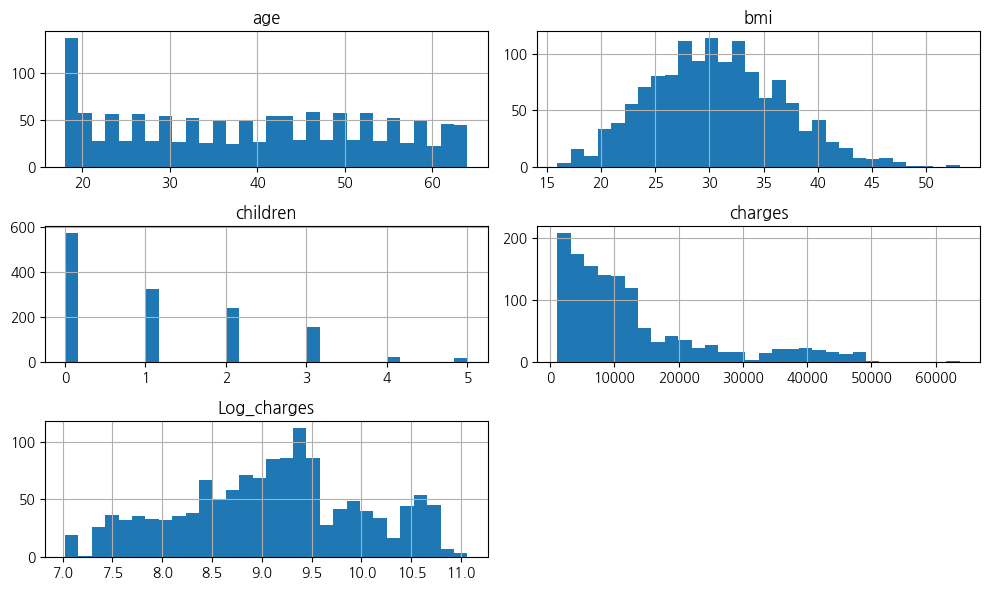

In [27]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')

# 로그변환하여 아웃라이어를 축소
data['Log_charges'] = np.log(data['charges'])
display(data.head())

data.hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.show();

<Axes: >

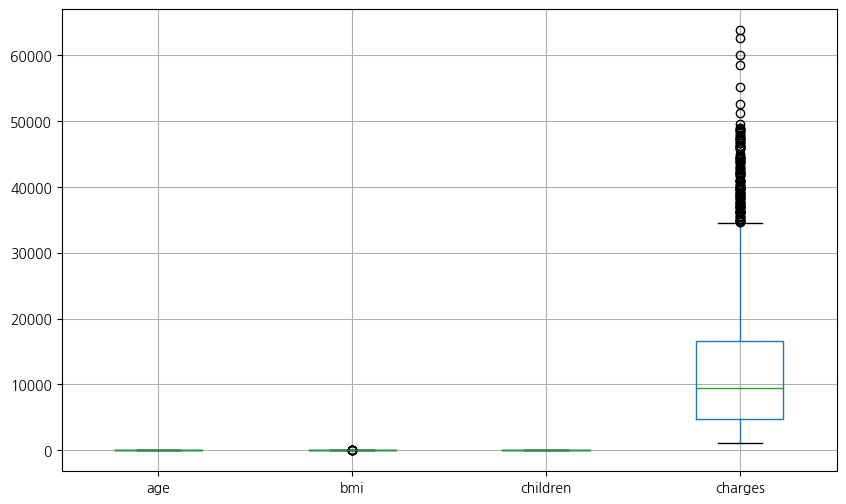

In [28]:
data.boxplot(column=['age', 'bmi', 'children', 'charges'], figsize=(10,6))

<Axes: >

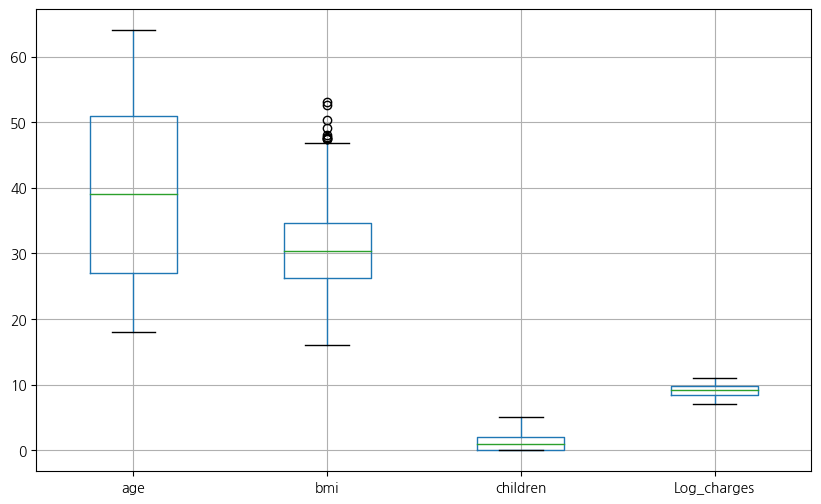

In [29]:
data.boxplot(column=['age', 'bmi', 'children', 'Log_charges'], figsize=(10,6))

In [30]:
# interquartile range 1.5배 이상인 관측치는 이상치로 간주  
# 이상치 확인 함수  
def check_outliers(x):  
    q1, q3 = np.percentile(x, [25, 75])  
    iqr = q3-q1  
    lower_bound = q1 - (iqr * 1.5)  
    upper_bound = q3 + (iqr * 1.5)  
    return np.where((x > upper_bound)|(x < lower_bound), -1, 1)  

# 함수실행 이상치 판단변수 생성(상하위범위 벗어나면 -1, 아니면 1의 값)
data['Q_outlier'] = check_outliers(data['charges'].values)  
data.head(50)


,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1


In [31]:
print(np.sum(data['Q_outlier'] == 1))  

1199


In [32]:
# Elliptical envelope를 이용한 이상치   

from sklearn.covariance import EllipticEnvelope  
outlier_detector = EllipticEnvelope(contamination=.1)  

# Predict outliers  
outlier_detector.fit(data[['charges']]) 
data['E_outlier'] = outlier_detector.predict(data[['charges']])  
display(data.head(50))

,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier,E_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1,1
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1,1
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1,1
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1,1
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1,1
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1,1
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1,1
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1,1
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1,1
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1,1


In [33]:
print(np.sum(data['E_outlier'] == 1))  

1204


In [34]:
# 이상치 제거하기   
data_no = data[data['E_outlier']==1]
display(data_no.head(50)) 


,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier,E_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1,1
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1,1
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1,1
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1,1
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1,1
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1,1
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1,1
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1,1
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1,1
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1,1


In [35]:
# 이상치(E_outlier=0)를 nan으로 변경  
data['E_outlier'].replace(-1, np.nan, inplace = True)  
display(data.head(50)) 


,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier,E_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1,1.0
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1,1.0
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1,1.0
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1,1.0
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1,1.0
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1,1.0
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1,1.0
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1,1.0
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1,1.0
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1,1.0


In [36]:
# E_outlier=nan을 9999로 대체  
data['E_outlier'].fillna(9999, inplace = True)  
display(data.head(50)) 


,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier,E_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1,1.0
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1,1.0
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1,1.0
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1,1.0
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1,1.0
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1,1.0
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1,1.0
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1,1.0
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1,1.0
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1,1.0


In [37]:
# E_outlier=9999을 nan으로 만들기
data['E_outlier'].replace(9999, 0, inplace = True)  
display(data.head(50)) 


,age,sex,bmi,children,smoker,region,charges,Log_charges,Q_outlier,E_outlier
0,19,female,27.9,0,yes,southwest,16884.9,9.734175,1,1.0
1,18,male,33.8,1,no,southeast,1725.6,7.453330,1,1.0
2,28,male,33.0,3,no,southeast,4449.5,8.400547,1,1.0
3,33,male,22.7,0,no,northwest,21984.5,9.998093,1,1.0
4,32,male,28.9,0,no,northwest,3866.9,8.260208,1,1.0
5,31,female,25.7,0,no,southeast,3756.6,8.231270,1,1.0
6,46,female,33.4,1,no,southeast,8240.6,9.016828,1,1.0
7,37,female,27.7,3,no,northwest,7281.5,8.893092,1,1.0
8,37,male,29.8,2,no,northeast,6406.4,8.765053,1,1.0
9,60,female,25.8,0,no,northwest,28923.1,10.272396,1,1.0


### 바. 이산화(binarizing) 및 다중 숫자화(Discretizing Variables 

In [38]:
# Importing the necessary functions from scikit learn  
from sklearn.preprocessing import Binarizer 


In [39]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422422
std,14.049960,6.098382,1.205493,12110.011588
min,18.000000,16.000000,0.000000,1121.900000
25%,27.000000,26.300000,0.000000,4740.300000
50%,39.000000,30.400000,1.000000,9382.050000
75%,51.000000,34.700000,2.000000,16639.900000
max,64.000000,53.100000,5.000000,63770.400000


In [40]:
# 이산화
binarizer = Binarizer(threshold=10000)  

data['BI_charges'] = binarizer.fit_transform(data[['charges']])  
display(data.head()) 

,age,sex,bmi,children,smoker,region,charges,BI_charges
0,19,female,27.9,0,yes,southwest,16884.9,1.0
1,18,male,33.8,1,no,southeast,1725.6,0.0
2,28,male,33.0,3,no,southeast,4449.5,0.0
3,33,male,22.7,0,no,northwest,21984.5,1.0
4,32,male,28.9,0,no,northwest,3866.9,0.0


In [41]:
# 다중숫자화 
data['DG_bmi'] = np.digitize(data['bmi'], bins=[24, 30, 36])  
display(data.head(50)) 


,age,sex,bmi,children,smoker,region,charges,BI_charges,DG_bmi
0,19,female,27.9,0,yes,southwest,16884.9,1.0,1
1,18,male,33.8,1,no,southeast,1725.6,0.0,2
2,28,male,33.0,3,no,southeast,4449.5,0.0,2
3,33,male,22.7,0,no,northwest,21984.5,1.0,0
4,32,male,28.9,0,no,northwest,3866.9,0.0,1
5,31,female,25.7,0,no,southeast,3756.6,0.0,1
6,46,female,33.4,1,no,southeast,8240.6,0.0,2
7,37,female,27.7,3,no,northwest,7281.5,0.0,1
8,37,male,29.8,2,no,northeast,6406.4,0.0,1
9,60,female,25.8,0,no,northwest,28923.1,1.0,1


### 사. 범주형 변수(Categorical Variables)

In [165]:
# Importing the necessary functions from scikit learn  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer 


In [172]:
# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')

# 2개의 카테고리를 구분 
bin_encoder = LabelBinarizer()  

data['BI_sex'] = bin_encoder.fit_transform(data[['sex']])  
display(data.head()) 


,age,sex,bmi,children,smoker,region,charges,BI_sex
0,19,female,27.9,0,yes,southwest,16884.9,0
1,18,male,33.8,1,no,southeast,1725.6,1
2,28,male,33.0,3,no,southeast,4449.5,1
3,33,male,22.7,0,no,northwest,21984.5,1
4,32,male,28.9,0,no,northwest,3866.9,1


In [173]:
# LabelEncoder allows creating a value for each category  
lab_encoder = LabelEncoder()  

# Replacing the transformed data  
data['LI_smoker'] = lab_encoder.fit_transform(data['smoker'])  
data['LI_region'] = lab_encoder.fit_transform(data['region'])  
display(data.head()) 


,age,sex,bmi,children,smoker,region,charges,BI_sex,LI_smoker,LI_region
0,19,female,27.9,0,yes,southwest,16884.9,0,1,3
1,18,male,33.8,1,no,southeast,1725.6,1,0,2
2,28,male,33.0,3,no,southeast,4449.5,1,0,2
3,33,male,22.7,0,no,northwest,21984.5,1,0,1
4,32,male,28.9,0,no,northwest,3866.9,1,0,1


In [174]:
mapper = {"male":0, "female":1}  
data["sex"].replace(mapper, inplace = True)  
display(data) 


,age,sex,bmi,children,smoker,region,charges,BI_sex,LI_smoker,LI_region
0,19,1,27.9,0,yes,southwest,16884.9,0,1,3
1,18,0,33.8,1,no,southeast,1725.6,1,0,2
2,28,0,33.0,3,no,southeast,4449.5,1,0,2
3,33,0,22.7,0,no,northwest,21984.5,1,0,1
4,32,0,28.9,0,no,northwest,3866.9,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,no,northwest,10600.5,1,0,1
1334,18,1,31.9,0,no,northeast,2206.0,0,0,0
1335,18,1,36.9,0,no,southeast,1629.8,0,0,2
1336,21,1,25.8,0,no,southwest,2007.9,0,0,3


In [132]:
# 범주변수(categories variables)를 더미(dummy variables)로 바꾸기 
# OneHotEncoder 함수 사용  
one_hot = OneHotEncoder()  
new_data = one_hot.fit_transform(data[['region']]).toarray()  
display(new_data) 


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [133]:
# Adding the dummy variables to the original data  
new_labels = np.unique(data_2['region'])  
new_df = pd.DataFrame(new_data, columns = new_labels)  
data_2 = pd.concat([data_2, new_df.iloc[:,:-1]], axis=1)  
del data_2['region'], new_data, new_labels, new_df 
display(data_2.head()) 


,age,sex,bmi,children,smoker,charges,Log_charges,northeast,northwest,southeast
0,19,female,27.900,0,yes,16884.92400,9.734176,0.0,0.0,0.0
1,18,male,33.770,1,no,1725.55230,7.453302,0.0,0.0,1.0
2,28,male,33.000,3,no,4449.46200,8.400538,0.0,0.0,1.0
3,33,male,22.705,0,no,21984.47061,9.998092,0.0,1.0,0.0
4,32,male,28.880,0,no,3866.85520,8.260197,0.0,1.0,0.0


In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer 

# 데이터 불러오기
data = pd.read_csv('Data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.9
1,18,male,33.8,1,no,southeast,1725.6
2,28,male,33.0,3,no,southeast,4449.5
3,33,male,22.7,0,no,northwest,21984.5
4,32,male,28.9,0,no,northwest,3866.9
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.5
1334,18,female,31.9,0,no,northeast,2206.0
1335,18,female,36.9,0,no,southeast,1629.8
1336,21,female,25.8,0,no,southwest,2007.9


In [183]:
Column_trans = ColumnTransformer(
  [("Scaling", StandardScaler(), ['age', 'bmi', 'charges']), 
   ("OneHot", OneHotEncoder(sparse=False), ['sex', 'smoker', 'region'])])

Column_trans.fit(data)
datatrans = Column_trans.transform(data)
df = pd.DataFrame(datatrans)
df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.438764,-0.453646,0.298582,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.514186,-0.953685,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.382954,-0.728672,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.306650,0.719845,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.289606,-0.776798,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.054876,-0.220555,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.202511,-0.914001,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.022707,-0.961599,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.798128,-0.930365,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [184]:
# 데이터 불러와서 데이터세트 전체에 있는 카테고리 변수를 더미변수로 만들기
data = pd.read_csv('Data/insurance.csv')

data_dum = pd.get_dummies(data)
data_dum


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.9,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.6,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.5,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.5,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.9,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.5,0,1,1,0,0,1,0,0
1334,18,31.9,0,2206.0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.8,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.9,1,0,1,0,0,0,0,1


## 아. 시계열 자료의 처리  

In [185]:
# 날짜변수 만들기(1) 
data = pd.read_csv('Data/Korea_GDP.csv')

new_index = pd.date_range(start='1961-03-31', periods=len(data), freq='Q')
data.index = pd.to_datetime(new_index)
data.index
display(data)

,Time,con,inv,ex,im,gdp,m2,exch,cpi
1961-03-31,1961/Q1,11712.5,-659.9,43.6,292.3,7000.7,24.0,NaN,NaN
1961-06-30,1961/Q2,9027.2,1736.8,56.3,392.2,8141.3,27.1,NaN,NaN
1961-09-30,1961/Q3,8652.8,833.2,70.8,283.1,6970.2,35.3,NaN,NaN
1961-12-31,1961/Q4,11409.4,950.7,66.8,332.0,8974.2,39.7,NaN,NaN
1962-03-31,1962/Q1,12551.8,-727.9,53.9,338.6,7444.8,42.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-31,2022/Q4,325942.0,159480.4,222599.2,194751.5,513770.2,3758235.5,1267.3,109.2
2023-03-31,2023/Q1,328883.8,132942.8,212895.0,198370.1,472155.5,3776930.1,1303.8,110.3
2023-06-30,2023/Q2,318657.5,146189.8,217836.1,185450.3,497345.6,3808194.2,1312.8,111.0
2023-09-30,2023/Q3,316042.1,148498.3,229952.8,192882.0,500997.0,3839468.6,1344.8,112.1


In [186]:
# 성장률(증가율)(exponential growth rate): 전년동기 대비 증가율
data['Gr_gdp'] = 100 * (np.log(data['gdp']) - np.log(data['gdp'].shift(4)))
data['Gr_con'] = 100 * (np.log(data['con']) - np.log(data['con'].shift(4)))
data

,Time,con,inv,ex,im,gdp,m2,exch,cpi,Gr_gdp,Gr_con
1961-03-31,1961/Q1,11712.5,-659.9,43.6,292.3,7000.7,24.0,NaN,NaN,NaN,NaN
1961-06-30,1961/Q2,9027.2,1736.8,56.3,392.2,8141.3,27.1,NaN,NaN,NaN,NaN
1961-09-30,1961/Q3,8652.8,833.2,70.8,283.1,6970.2,35.3,NaN,NaN,NaN,NaN
1961-12-31,1961/Q4,11409.4,950.7,66.8,332.0,8974.2,39.7,NaN,NaN,NaN,NaN
1962-03-31,1962/Q1,12551.8,-727.9,53.9,338.6,7444.8,42.0,NaN,NaN,6.150566,6.920743
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022/Q4,325942.0,159480.4,222599.2,194751.5,513770.2,3758235.5,1267.3,109.2,1.386980,3.314700
2023-03-31,2023/Q1,328883.8,132942.8,212895.0,198370.1,472155.5,3776930.1,1303.8,110.3,0.894415,4.294648
2023-06-30,2023/Q2,318657.5,146189.8,217836.1,185450.3,497345.6,3808194.2,1312.8,111.0,0.885022,1.381441
2023-09-30,2023/Q3,316042.1,148498.3,229952.8,192882.0,500997.0,3839468.6,1344.8,112.1,1.375169,0.489931


In [187]:
# 전년동기 퍼센트 변화(Percent change)
data['Pc_gdp'] = 100*data['gdp'].pct_change(periods=4)
data['Pc_con'] = 100*data['con'].pct_change(periods=4)
data

,Time,con,inv,ex,im,gdp,m2,exch,cpi,Gr_gdp,Gr_con,Pc_gdp,Pc_con
1961-03-31,1961/Q1,11712.5,-659.9,43.6,292.3,7000.7,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-30,1961/Q2,9027.2,1736.8,56.3,392.2,8141.3,27.1,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-30,1961/Q3,8652.8,833.2,70.8,283.1,6970.2,35.3,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-31,1961/Q4,11409.4,950.7,66.8,332.0,8974.2,39.7,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,1962/Q1,12551.8,-727.9,53.9,338.6,7444.8,42.0,NaN,NaN,6.150566,6.920743,6.343651,7.165848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022/Q4,325942.0,159480.4,222599.2,194751.5,513770.2,3758235.5,1267.3,109.2,1.386980,3.314700,1.396643,3.370248
2023-03-31,2023/Q1,328883.8,132942.8,212895.0,198370.1,472155.5,3776930.1,1303.8,110.3,0.894415,4.294648,0.898427,4.388202
2023-06-30,2023/Q2,318657.5,146189.8,217836.1,185450.3,497345.6,3808194.2,1312.8,111.0,0.885022,1.381441,0.888950,1.391027
2023-09-30,2023/Q3,316042.1,148498.3,229952.8,192882.0,500997.0,3839468.6,1344.8,112.1,1.375169,0.489931,1.384668,0.491133


In [188]:
# 차분
data['D1_gdp'] = data['gdp'].diff() 
data

,Time,con,inv,ex,im,gdp,m2,exch,cpi,Gr_gdp,Gr_con,Pc_gdp,Pc_con,D1_gdp
1961-03-31,1961/Q1,11712.5,-659.9,43.6,292.3,7000.7,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-30,1961/Q2,9027.2,1736.8,56.3,392.2,8141.3,27.1,NaN,NaN,NaN,NaN,NaN,NaN,1140.6
1961-09-30,1961/Q3,8652.8,833.2,70.8,283.1,6970.2,35.3,NaN,NaN,NaN,NaN,NaN,NaN,-1171.1
1961-12-31,1961/Q4,11409.4,950.7,66.8,332.0,8974.2,39.7,NaN,NaN,NaN,NaN,NaN,NaN,2004.0
1962-03-31,1962/Q1,12551.8,-727.9,53.9,338.6,7444.8,42.0,NaN,NaN,6.150566,6.920743,6.343651,7.165848,-1529.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,2022/Q4,325942.0,159480.4,222599.2,194751.5,513770.2,3758235.5,1267.3,109.2,1.386980,3.314700,1.396643,3.370248,19615.6
2023-03-31,2023/Q1,328883.8,132942.8,212895.0,198370.1,472155.5,3776930.1,1303.8,110.3,0.894415,4.294648,0.898427,4.388202,-41614.7
2023-06-30,2023/Q2,318657.5,146189.8,217836.1,185450.3,497345.6,3808194.2,1312.8,111.0,0.885022,1.381441,0.888950,1.391027,25190.1
2023-09-30,2023/Q3,316042.1,148498.3,229952.8,192882.0,500997.0,3839468.6,1344.8,112.1,1.375169,0.489931,1.384668,0.491133,3651.4


<Axes: >

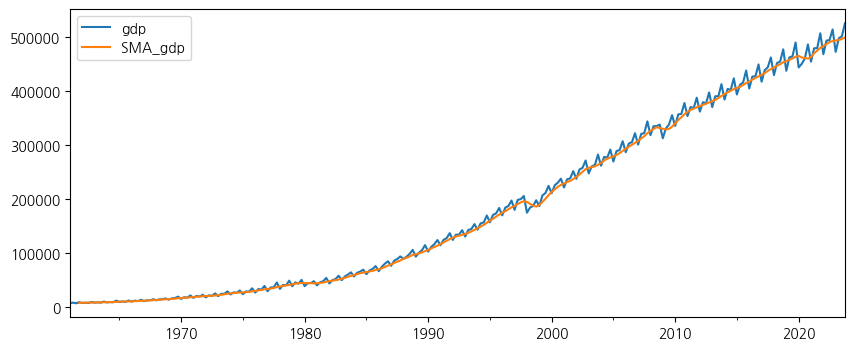

In [202]:
# 이동평균
data['SMA_gdp']    = data['gdp'].rolling(window=4).mean()

data[['gdp','SMA_gdp']].plot(figsize=(10,4))

In [203]:
# 자료의 Frequency변경
#일별자료를 주별자료 변환하려면 resample 사용  
data_Yr = data.resample('Y').last()  
data_Yr

,Time,con,inv,ex,im,gdp,m2,exch,cpi,Gr_gdp,Gr_con,Pc_gdp,Pc_con,D1_gdp,SMA_gdp
1961-12-31,1961/Q4,11409.4,950.7,66.8,332.0,8974.2,39.7,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,7771.600
1962-12-31,1962/Q4,12483.3,1082.9,88.6,548.2,9373.0,49.7,NaN,NaN,4.347942,8.995417,4.443850,9.412414,1903.3,8074.325
1963-12-31,1963/Q4,13613.0,1046.6,79.2,567.1,10116.6,53.5,NaN,NaN,7.634442,8.663347,7.933426,9.049690,1923.9,8802.700
1964-12-31,1964/Q4,14388.0,1576.3,121.2,469.3,11898.8,61.7,255.8,NaN,16.225992,5.536931,17.616591,5.693087,3037.5,9636.625
1965-12-31,1965/Q4,15432.1,1257.2,185.7,593.8,12089.4,93.7,271.8,2.6,1.589148,7.005523,1.601842,7.256742,2576.2,10341.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,2019/Q4,308185.1,149300.0,208909.0,176939.4,489600.7,2913609.6,1157.8,99.7,2.630997,3.284899,2.665913,3.339447,25625.1,463166.600
2020-12-31,2020/Q4,295602.4,151444.6,211924.1,173051.7,485964.3,3199835.7,1088.0,100.2,-0.745500,-4.168527,-0.742728,-4.082839,25984.4,459880.825
2021-12-31,2021/Q4,315315.1,157054.9,228768.4,193803.1,506693.5,3613687.6,1185.5,103.8,4.177112,6.455715,4.265581,6.668654,27660.6,479677.500
2022-12-31,2022/Q4,325942.0,159480.4,222599.2,194751.5,513770.2,3758235.5,1267.3,109.2,1.386980,3.314700,1.396643,3.370248,19615.6,492209.875
